# ANÁLISE EXPLORATÓRIA REFEIÇÕES DO MC DONALDS´S

## DESCRIÇÃO


>*Em 1954, um homem chamado Ray Kroc descobriu uma pequena lanchonete na Califórnia e escreveu a primeira página de nossa história. A partir de um humilde início como um pequeno restaurante, temos orgulho de ter nos tornado uma das marcas líderes mundiais em serviços de alimentação, com mais de 36.000 restaurantes em mais de 100 países.*


O presente conjunto de dados contém itens do menu do restaurante McDonald´s nos EUA. Ele engloba 260 itens divididos em 32 categorias, contendo os valores nutricionais, tanto os macronutrientes proteína, carboidratos e gorduras, quanto os micronutrientes sódio, vitamina C, dentre outros. Abaixo apresentamos algumas questões que buscaremos responder a partir do presente conjunto de dados.


**QUESTÕES:** <br>
A) Quantas calorias contém em média uma refeição do McDonald's? <br>
B) Quantas calorias possuem as bebidas, café e chás? <br>
C) O frango grelhado pedido em vez de crocante aumenta o valor calórico de um sanduíche? <br>
D) Que tal pedir claras em vez de ovos inteiros? <br>
E) Que tipo de refeições são menos saudáveis no menu do Mc Donald´s?<br>

<div align="right">
    <b>Dataset:</b> <a href="url">https://www.kaggle.com/mcdonalds/nutrition-factslink </a> </div>

## 1. IMPORTAR, PREPARAR E TRATAR OS DADOS

In [1]:
# Carregar pacotes
library(tidyverse)
library(gridExtra)
library(summarytools)
library(corrplot)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp

For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')


Attaching package: 'summarytools'


The following object is masked from 'package:tibble':

    view


corrplot 0.84 loaded



In [2]:
# Importar dados
df_mc<- read.csv("menu.csv") %>%
as.tibble()

Warning message:
"`as.tibble()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


In [3]:
# Sumário dos dados
summary(df_mc)

   Category             Item           Serving.Size          Calories     
 Length:260         Length:260         Length:260         Min.   :   0.0  
 Class :character   Class :character   Class :character   1st Qu.: 210.0  
 Mode  :character   Mode  :character   Mode  :character   Median : 340.0  
                                                          Mean   : 368.3  
                                                          3rd Qu.: 500.0  
                                                          Max.   :1880.0  
 Calories.from.Fat   Total.Fat       Total.Fat....Daily.Value. Saturated.Fat   
 Min.   :   0.0    Min.   :  0.000   Min.   :  0.00            Min.   : 0.000  
 1st Qu.:  20.0    1st Qu.:  2.375   1st Qu.:  3.75            1st Qu.: 1.000  
 Median : 100.0    Median : 11.000   Median : 17.00            Median : 5.000  
 Mean   : 127.1    Mean   : 14.165   Mean   : 21.82            Mean   : 6.008  
 3rd Qu.: 200.0    3rd Qu.: 22.250   3rd Qu.: 35.00            3rd Qu.:10.0

In [4]:
# Pre-processamento dos dados
df_mc$Category<- factor(df_mc$Category)
df_mc$Item<- factor(df_mc$Item)
df_mc$Serving.Size<- factor(df_mc$Serving.Size)
Categorias<-table(df_mc$Category)
colnames(df_mc)<-c('Category','Item','Serving.Size','Calories','Calories.from.Fat','Total.Fat','Total.Fat.Daily.Value',
                   'Saturated.Fat','Saturated.Fat.Daily.Value','Trans.Fat','Cholesterol','Cholesterol.Daily.Value','Sodium',
                   'Sodium.Daily.Value','Carbohydrates','Carbohydrates.Daily.Value','Dietary.Fiber','Dietary.Fiber.Daily.Value',
                   'Sugars','Protein','Vitamin.A.Daily.Value','Vitamin.C.Daily.Value','Calcium.Daily.Value','Iron.Daily.Value')

In [5]:
# Visualiação das seis primeiras linhas
head(df_mc)

Category,Item,Serving.Size,Calories,Calories.from.Fat,Total.Fat,Total.Fat.Daily.Value,Saturated.Fat,Saturated.Fat.Daily.Value,Trans.Fat,...,Carbohydrates,Carbohydrates.Daily.Value,Dietary.Fiber,Dietary.Fiber.Daily.Value,Sugars,Protein,Vitamin.A.Daily.Value,Vitamin.C.Daily.Value,Calcium.Daily.Value,Iron.Daily.Value
<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13,20,5,25,0,...,31,10,4,17,3,17,10,0,25,15
Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8,12,3,15,0,...,30,10,4,17,3,18,6,0,25,8
Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23,35,8,42,0,...,29,10,4,17,2,14,8,0,25,10
Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28,43,10,52,0,...,30,10,4,17,2,21,15,0,30,15
Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23,35,8,42,0,...,30,10,4,17,2,21,6,0,25,10
Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23,36,9,46,1,...,31,10,4,18,3,26,15,2,30,20


In [6]:
# Visualiação das seis últimas linhas
tail(df_mc)

Category,Item,Serving.Size,Calories,Calories.from.Fat,Total.Fat,Total.Fat.Daily.Value,Saturated.Fat,Saturated.Fat.Daily.Value,Trans.Fat,...,Carbohydrates,Carbohydrates.Daily.Value,Dietary.Fiber,Dietary.Fiber.Daily.Value,Sugars,Protein,Vitamin.A.Daily.Value,Vitamin.C.Daily.Value,Calcium.Daily.Value,Iron.Daily.Value
<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Smoothies & Shakes,McFlurry with M&Mâ€™s Candies (Snack),7.3 oz (207 g),430,140,15,24,10,48,0.0,...,64,21,1,4,59,9,10,0,30,4
Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17,26,9,44,0.5,...,80,27,1,4,64,12,15,0,40,8
Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23,35,12,58,1.0,...,106,35,1,5,85,15,20,0,50,10
Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11,17,6,29,0.0,...,53,18,1,2,43,8,10,0,25,6
Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32,50,15,76,1.0,...,114,38,2,9,103,21,20,0,60,6
Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16,25,8,38,0.0,...,57,19,1,5,51,10,10,0,30,4


## 2. ANÁLISE DESCRITIVA - MC DONALD´S

In [7]:
# Estatística descritiva dos dados
summarytools::descr(df_mc)

,Calcium.Daily.Value,Calories,Calories.from.Fat,Carbohydrates,Carbohydrates.Daily.Value,Cholesterol,Cholesterol.Daily.Value,Dietary.Fiber,Dietary.Fiber.Daily.Value,Iron.Daily.Value,...,Saturated.Fat,Saturated.Fat.Daily.Value,Sodium,Sodium.Daily.Value,Sugars,Total.Fat,Total.Fat.Daily.Value,Trans.Fat,Vitamin.A.Daily.Value,Vitamin.C.Daily.Value
Mean,20.9730769,368.2692308,127.0961538,47.3461538,15.7807692,54.9423077,18.3923077,1.6307692,6.5307692,7.7346154,...,6.0076923,29.9653846,495.7500000,20.6769231,29.4230769,14.1653846,21.8153846,0.2038462,13.4269231,8.5346154
Std.Dev,17.0199533,240.2698865,127.8759141,28.2522317,9.4195443,87.2692575,29.0916528,1.5677171,6.3070573,8.7232633,...,5.3218732,26.6392088,577.0263230,24.0349538,28.6797967,14.2059980,21.8851988,0.4291329,24.3663807,26.3455423
Min,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,...,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
Q1,6.0000000,210.0000000,20.0000000,30.0000000,10.0000000,5.0000000,2.0000000,0.0000000,0.0000000,0.0000000,...,1.0000000,4.5000000,105.0000000,4.5000000,5.5000000,2.2500000,3.5000000,0.0000000,2.0000000,0.0000000
Median,20.0000000,340.0000000,100.0000000,44.0000000,15.0000000,35.0000000,11.0000000,1.0000000,5.0000000,4.0000000,...,5.0000000,24.0000000,190.0000000,8.0000000,17.5000000,11.0000000,17.0000000,0.0000000,8.0000000,0.0000000
Q3,30.0000000,500.0000000,200.0000000,60.0000000,20.0000000,65.0000000,21.5000000,3.0000000,10.0000000,15.0000000,...,10.0000000,48.0000000,870.0000000,36.5000000,48.0000000,22.5000000,35.0000000,0.0000000,15.0000000,4.0000000
Max,70.0000000,1880.0000000,1060.0000000,141.0000000,47.0000000,575.0000000,192.0000000,7.0000000,28.0000000,40.0000000,...,20.0000000,102.0000000,3600.0000000,150.0000000,128.0000000,118.0000000,182.0000000,2.5000000,170.0000000,240.0000000
MAD,17.7912000,207.5640000,133.4340000,20.7564000,7.4130000,44.4780000,13.3434000,1.4826000,7.4130000,5.9304000,...,6.3010500,31.1346000,218.6835000,8.8956000,24.4629000,14.8260000,23.7216000,0.0000000,10.3782000,0.0000000
IQR,24.0000000,290.0000000,180.0000000,30.0000000,10.0000000,60.0000000,19.2500000,3.0000000,10.0000000,15.0000000,...,9.0000000,43.2500000,757.5000000,31.5000000,42.2500000,19.8750000,31.2500000,0.0000000,13.0000000,4.0000000
CV,0.8115144,0.6524300,1.0061352,0.5967165,0.5969002,1.5883799,1.5817293,0.9613359,0.9657449,1.1278212,...,0.8858432,0.8889994,1.1639462,1.1624048,0.9747382,1.0028671,1.0032002,2.1051802,1.8147405,3.0869045


In [8]:
# Estatística Resumida dos Macronutrientes
df_mc %>%
select(Category, Item, Carbohydrates, Protein, Total.Fat, Calories) %>%
descr(stats = "common")

,Calories,Carbohydrates,Protein,Total.Fat
Mean,368.2692,47.34615,13.33846,14.16538
Std.Dev,240.2699,28.25223,11.42615,14.20600
Min,0.0000,0.00000,0.00000,0.00000
Median,340.0000,44.00000,12.00000,11.00000
Max,1880.0000,141.00000,87.00000,118.00000
N.Valid,260.0000,260.00000,260.00000,260.00000
Pct.Valid,100.0000,100.00000,100.00000,100.00000


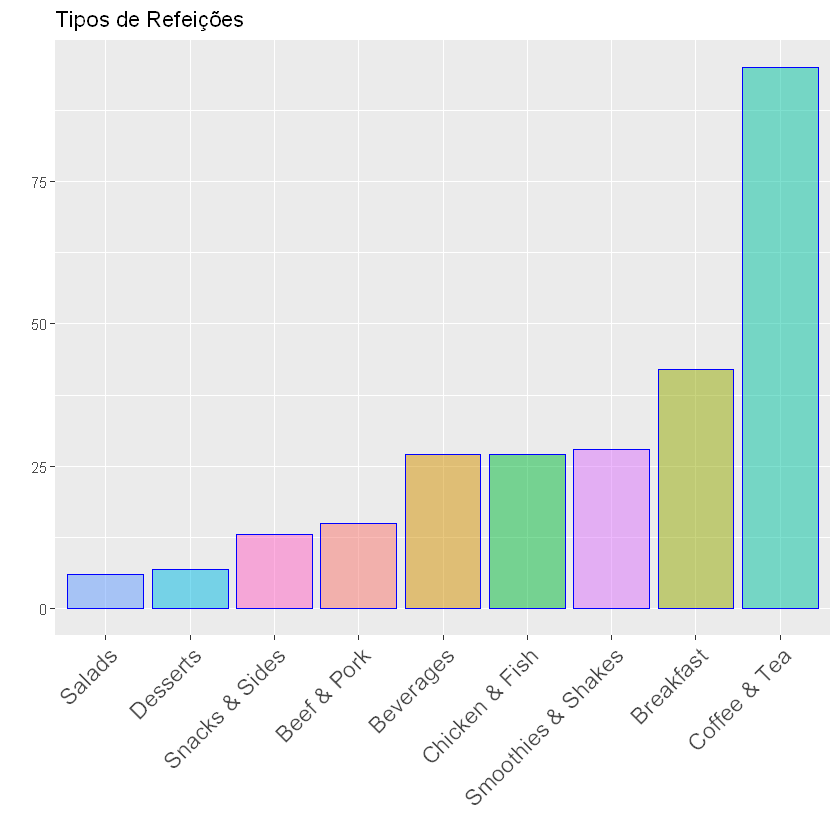

In [9]:
# Tipos de refeições
df_mc %>%
ggplot(aes(x=reorder(Category, Categorias[Category]), fill = Category)) +
geom_bar(show.legend=F, color="blue", alpha=0.5) +
theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size = 14)) +
labs(title="Tipos de Refeições", x="", y="")

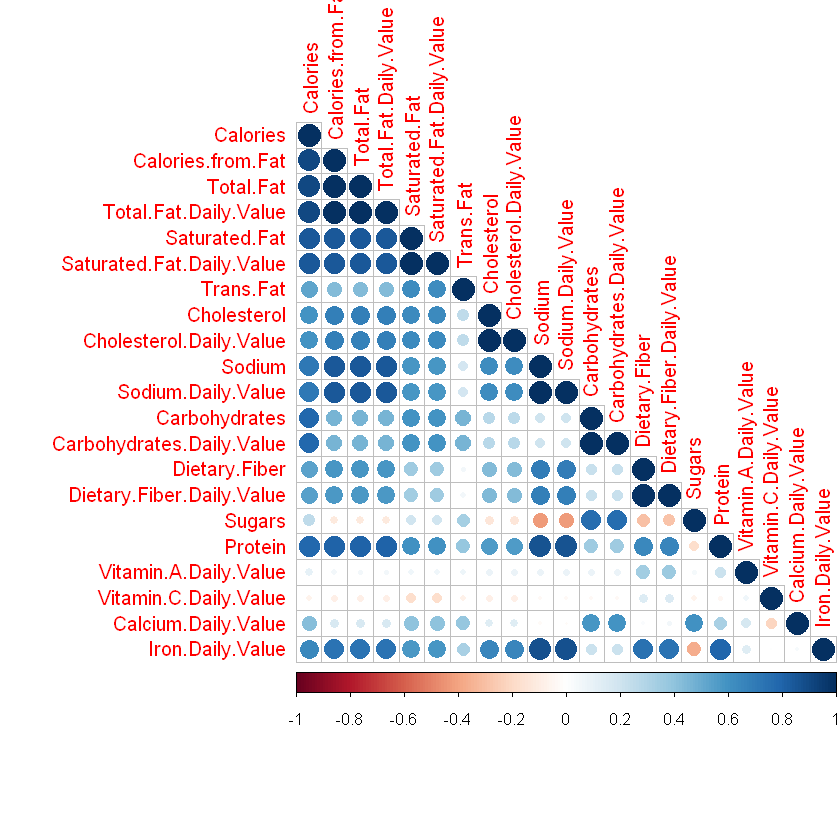

In [10]:
# Gráfico de correlação
cor<- cor(df_mc[,4:24])
corrplot(cor, type="lower")

## A. Quantas calorias contém em média uma refeição do McDonald's? 



-> *O valor médio calórico de uma refeição servida no Mc Donald´s é de 368,3 calorias (representado no gráfico pela linha vermelha pontilhada). No gráfico de densidade podemos ver o valor médio calórico por tipo de refeição, como chás, lanches de café da manhã, saladas, etc.*

In [34]:
#Sumário da variável "Calorias"
summary(df1$Calories) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   210.0   340.0   368.3   500.0  1880.0 

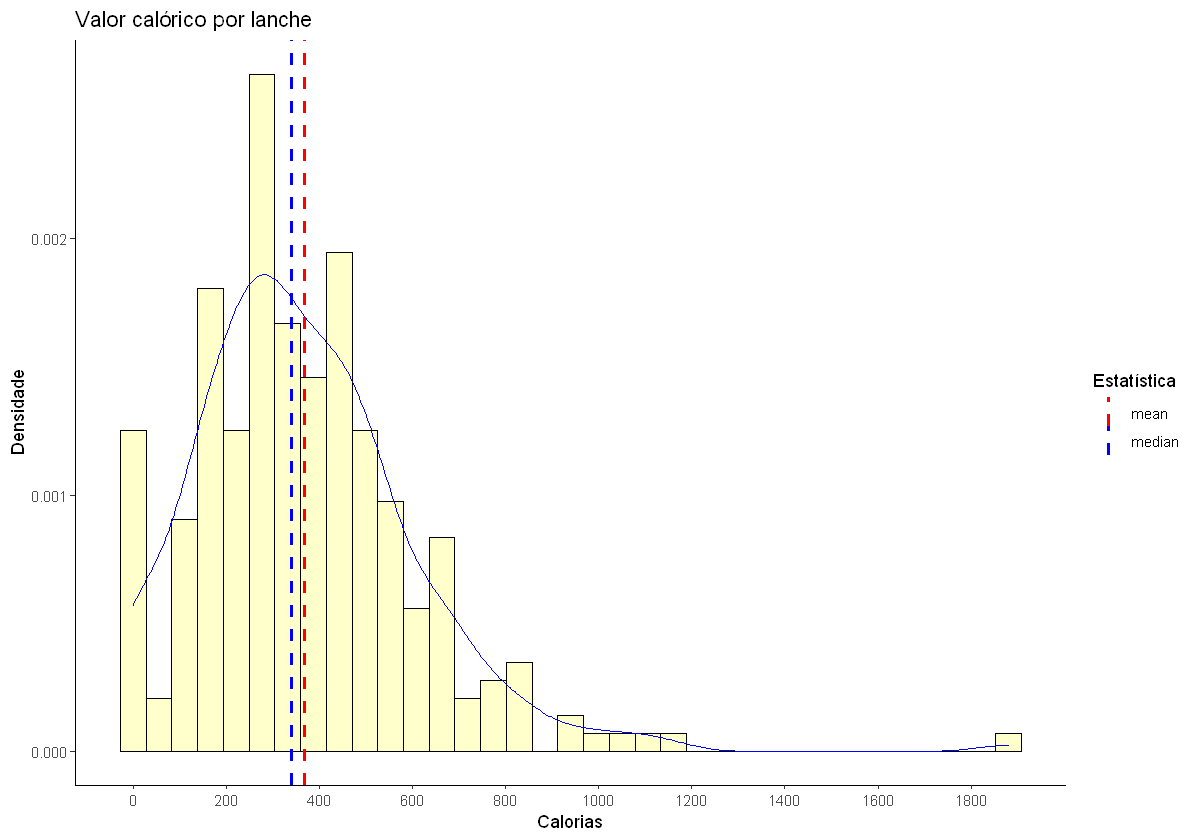

In [19]:
# Histograma do valor calórico (com média e mediana)
options(repr.plot.width = 10, repr.plot.height = 7)
df_mc %>%
ggplot(aes(Calories)) +
geom_histogram(aes(y=..density..),fill = "yellow", color = "black", alpha = .2, bins = 35) +
geom_density(color = "blue") +
scale_x_continuous(breaks = seq(min(df1$Calories), max(df1$Calories), by = 200)) +
geom_vline(aes(xintercept = mean(Calories), col= "mean"),size=1, linetype = "dashed") +
geom_vline(aes(xintercept = median(Calories), col= "median"),size=1, linetype = "dashed") +
scale_color_manual(name = "Estatística", values = c(median = "blue", mean = "red")) +
ggtitle("Valor calórico por lanche") +
ylab("Densidade") +
xlab("Calorias") +
theme_classic()

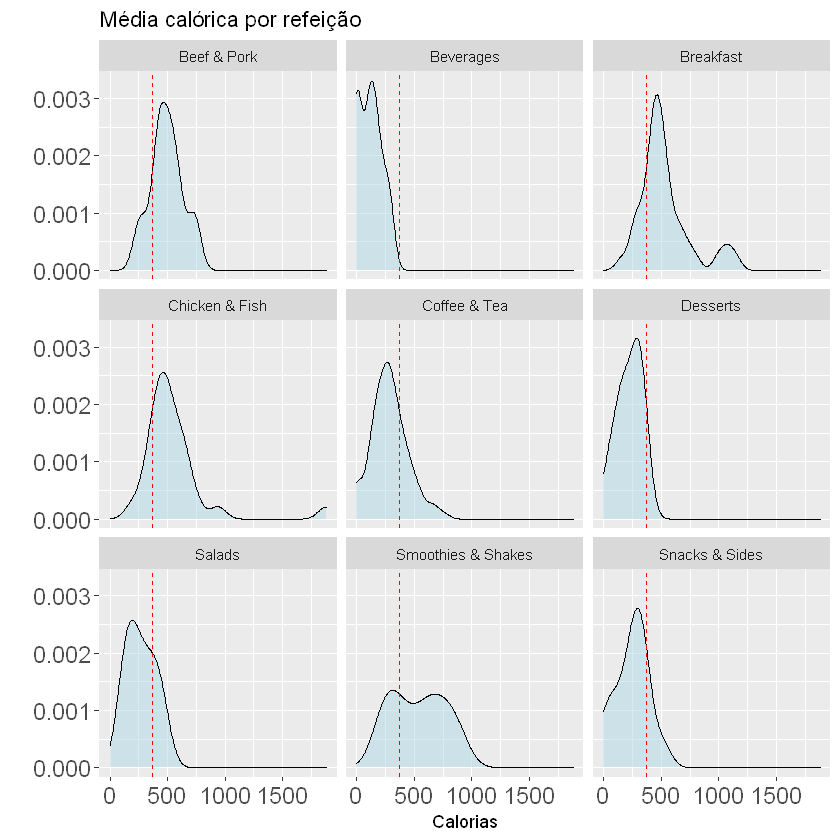

In [32]:
# Gráfico de densidade Calorias por tipo de refeição
df_mc %>%
ggplot(aes(x = Calories)) + 
geom_density(fill="lightblue", alpha=.5) +
facet_wrap( ~ Category) +
geom_vline(aes(xintercept = mean(Calories)), color = "red", linetype = 2) +
labs(title="Média calórica por refeição", x="Calorias", y="") +
theme(axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14))

## B. Quantas calorias possuem as bebidas, café e chás?

*-> As bebidas possuem em média 114 calorias, enquanto os cafés e chás possuem 284 calorias. No boxplot podemos ver a sua distribuição dos valores calóricos. Nota-se que os cafés e chás possuem valor calórico médio próximo a média das refeições do Mc Donald´s, enquanto as bebidas possuem aproximadamente apenas 1/3 do valor calórico médio.*

In [14]:
df_mc %>%
na.omit() %>%
filter(Category == "Beverages") %>%
select(Calories) %>%
summary()

    Calories    
 Min.   :  0.0  
 1st Qu.:  0.0  
 Median :100.0  
 Mean   :113.7  
 3rd Qu.:190.0  
 Max.   :280.0  

In [13]:
df_mc %>%
na.omit() %>%
filter(Category == "Coffee & Tea") %>%
select(Calories) %>%
summary()

    Calories    
 Min.   :  0.0  
 1st Qu.:180.0  
 Median :270.0  
 Mean   :283.9  
 3rd Qu.:370.0  
 Max.   :760.0  

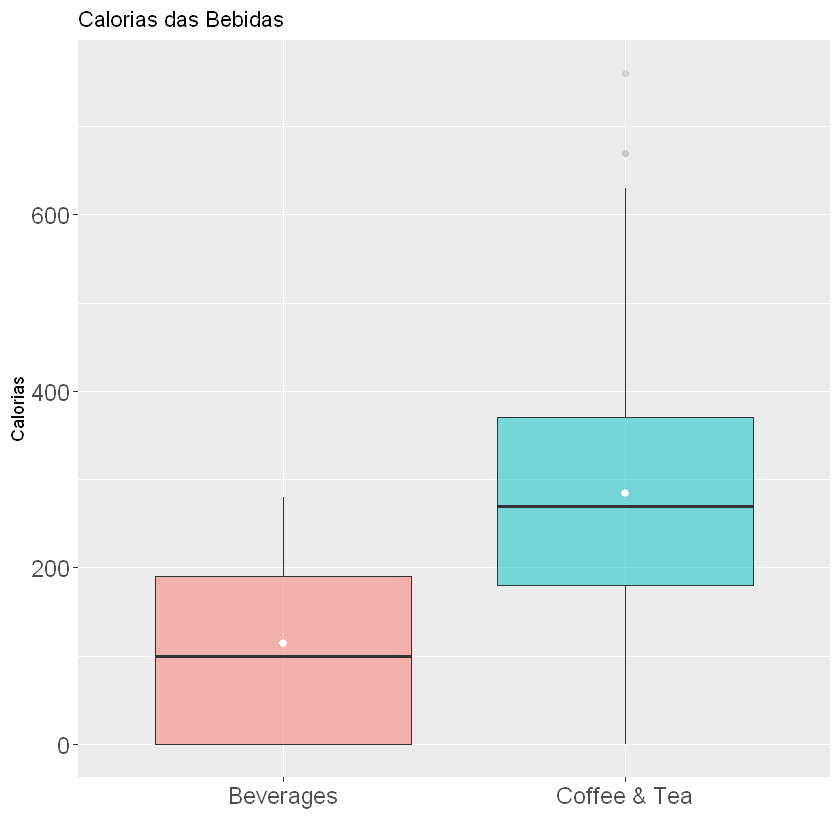

In [33]:
# Gráfico de valor calórico das bebidas, cafés e chás
df_mc %>%
filter(Category == "Beverages" | Category == "Coffee & Tea") %>%
ggplot(aes(Category, Calories, fill = Category)) +
geom_boxplot(outlier.color= "grey", alpha = .5, show.legend=F) +
stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
labs(title="Calorias das Bebidas", x="", y= "Calorias") +
theme(axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14))


## C. Os lanches com frango grelhado em vez de crocante aumenta o valor calórico de um sanduíche?

-> As refeições com frango grelhado possuem em média 387 calorias. Já as refeições que possuem frango crocante possuem em média 520 calorias. O frango grelhado não aumenta o valor calórico do lanche, uma vez que possui por volta de 133 calorias a menos. No boxplot podemos ver a distribuição dos valores calóricos do frango grelhado e o crocante.

In [81]:
# Calorias Frango Grelhado
df_mc %>%
filter(str_detect(Item, "Grilled Chicken")) %>%
descr(Calories, stats = "common")

,Calories
Mean,386.9231
Std.Dev,120.9948
Min,220.0000
Median,380.0000
Max,590.0000
N.Valid,13.0000
Pct.Valid,100.0000


In [82]:
# Calorias Frango Crocante
df_mc %>%
filter(str_detect(Item, "Crispy Chicken")) %>%
descr(Calories, stats = "common")

,Calories
Mean,520.0000
Std.Dev,139.6149
Min,330.0000
Median,525.0000
Max,750.0000
N.Valid,14.0000
Pct.Valid,100.0000


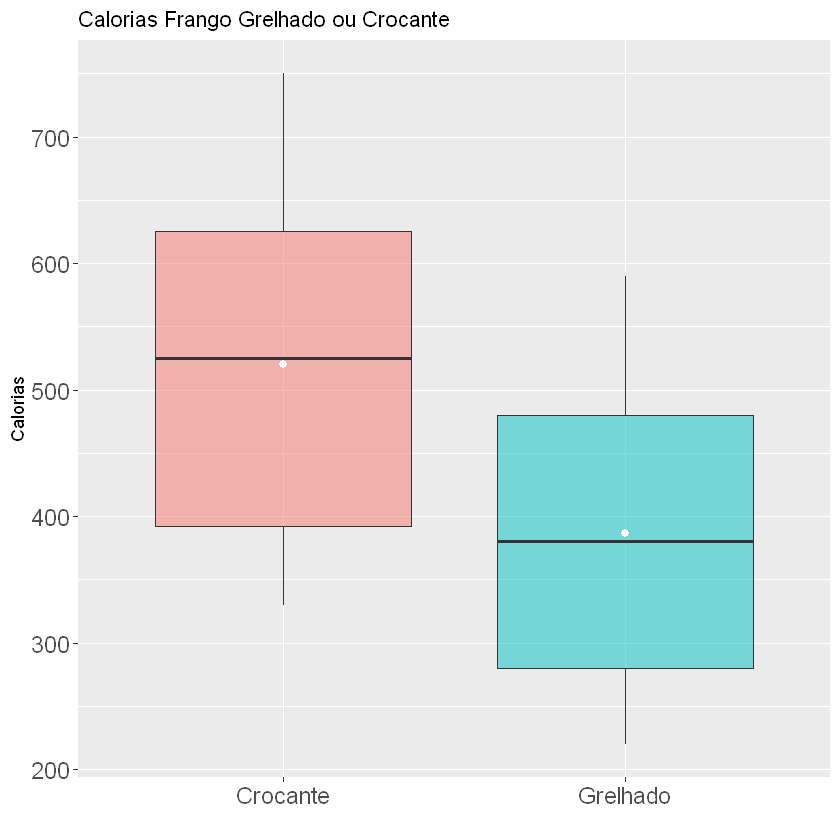

In [33]:
# Gráfico Calorias Frango Grelhado ou Crocante
df_mc %>%
mutate(Chicken = case_when(str_detect(Item, "Grilled Chicken") ~ "Grelhado",
                          str_detect(Item, "Crispy Chicken") ~ "Crocante")) %>%
na.omit() %>%
ggplot(aes(factor(Chicken), Calories, fill = factor(Chicken))) +
geom_boxplot(show.legend=F, alpha=.5) +
stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
labs(title="Calorias Frango Grelhado ou Crocante", x="", y= "Calorias") +
theme(axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14))



## D. Que tal pedir claras em vez de ovos inteiros?

-> Pedir refeições com clara no lugar de ovos inteiros representa em média 592 calorias, 24 gramas de proteínas, 55 gramas de carboidratos e 31 gramas de gorduras totais. O gráfico de densidade apresenta a sua distribuição média calórica.

In [18]:
# Estatística Resumida Refeições com Claras
df_mc %>%
filter(str_detect(Item, "Egg Whites")) %>%
select(Calories, Protein, Carbohydrates, Total.Fat) %>%
summary()

    Calories         Protein      Carbohydrates     Total.Fat    
 Min.   : 400.0   Min.   :18.00   Min.   : 30.0   Min.   :15.00  
 1st Qu.: 447.5   1st Qu.:20.00   1st Qu.: 39.0   1st Qu.:24.50  
 Median : 510.0   Median :21.00   Median : 46.5   Median :26.50  
 Mean   : 591.7   Mean   :24.17   Mean   : 55.0   Mean   :30.58  
 3rd Qu.: 652.5   3rd Qu.:27.00   3rd Qu.: 55.0   3rd Qu.:38.00  
 Max.   :1050.0   Max.   :35.00   Max.   :115.0   Max.   :50.00  

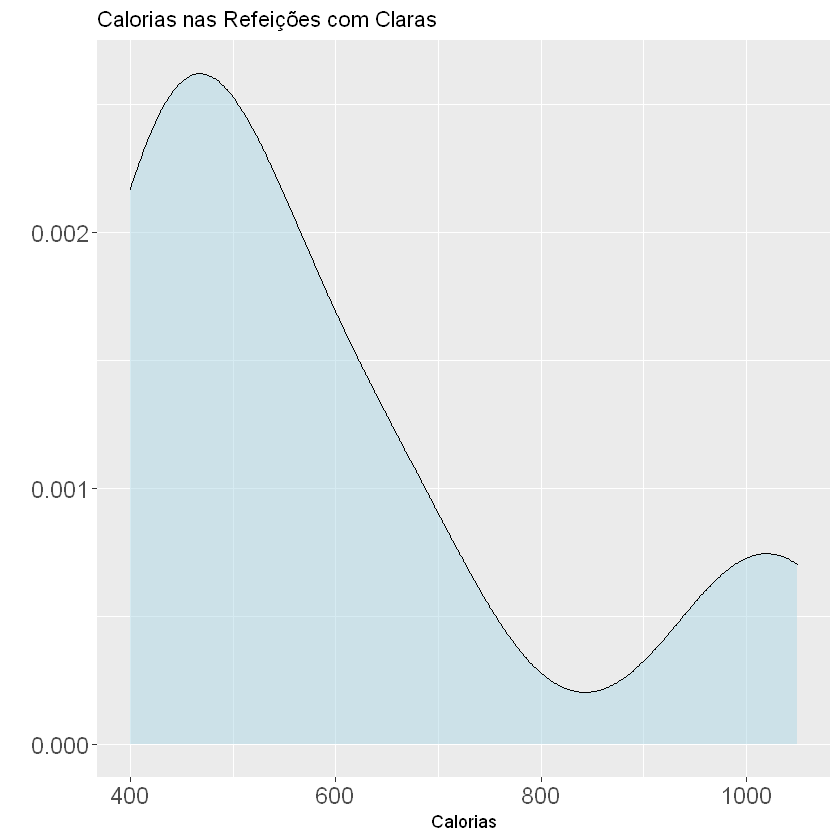

In [36]:
# Gráfico Calorias Refeições com Claras
df_mc %>%
filter(str_detect(Item, "Egg Whites")) %>%
ggplot(aes(x = Calories)) + 
geom_density(fill="lightblue", alpha=.5) +
theme(axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14)) +
labs(title="Calorias nas Refeições com Claras", x="Calorias", y="")

## E. Que tipo de refeições são menos saudáveis no menu do Mc Donald´s?

-> As categorias **Chicken & Fish**, **Breakfast**, **Beef & Pork** e **Smoothies & Shakes** possuem em média o maior valor calórico. Como por exemplo um café da manhã completo com bife, batata frita, ovos mexidos; refeição de nugget de frango ou sorvete de M&M's. **Breakfast** em média tem 150 miligramas de colesterol. Por sua vez, **Chicken & Fish**, **Breakfast** e **Beef & Pork** possuem maior média de gorduras totais.

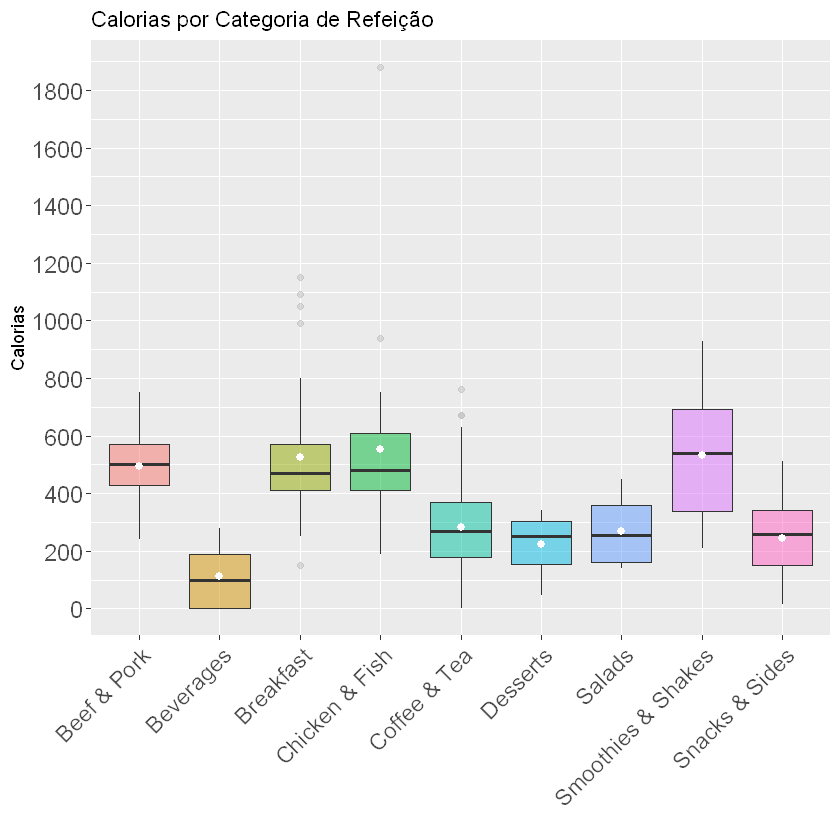

In [29]:
df_mc %>%
ggplot(aes(Category, Calories, fill = Category)) +
geom_boxplot(outlier.color= "grey", alpha = .5, show.legend=F) +
stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
scale_y_continuous(breaks = seq(0,1900,200)) + 
labs(title="Calorias por Categoria de Refeição", x="", y= "Calorias") +
theme(axis.text.x = element_text(angle = 45, hjust = 1,
                                 vjust = 1,size = 14), 
      axis.text.y = element_text(size = 14))


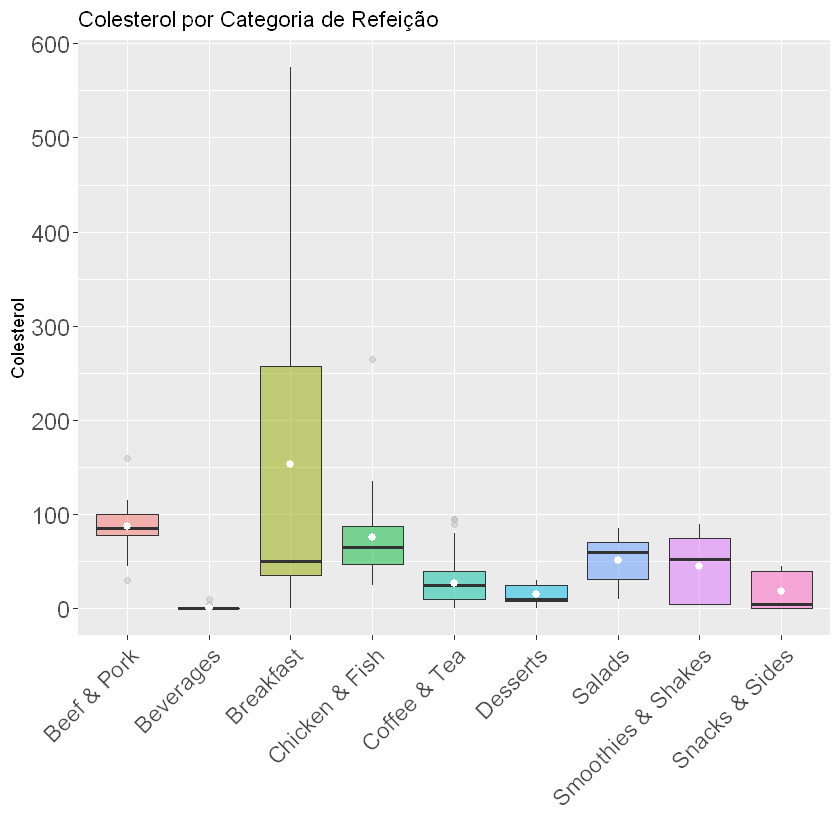

In [30]:
df_mc %>%
ggplot(aes(Category, Cholesterol, fill = Category)) +
geom_boxplot(outlier.color= "grey", alpha = .5, show.legend=F) +
stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
scale_y_continuous(breaks = seq(0,600,100)) +
labs(title="Colesterol por Categoria de Refeição", x="", y= "Colesterol") +
theme(axis.text.x = element_text(angle = 45, hjust = 1,
                                 vjust = 1,size = 14), 
      axis.text.y = element_text(size = 14))

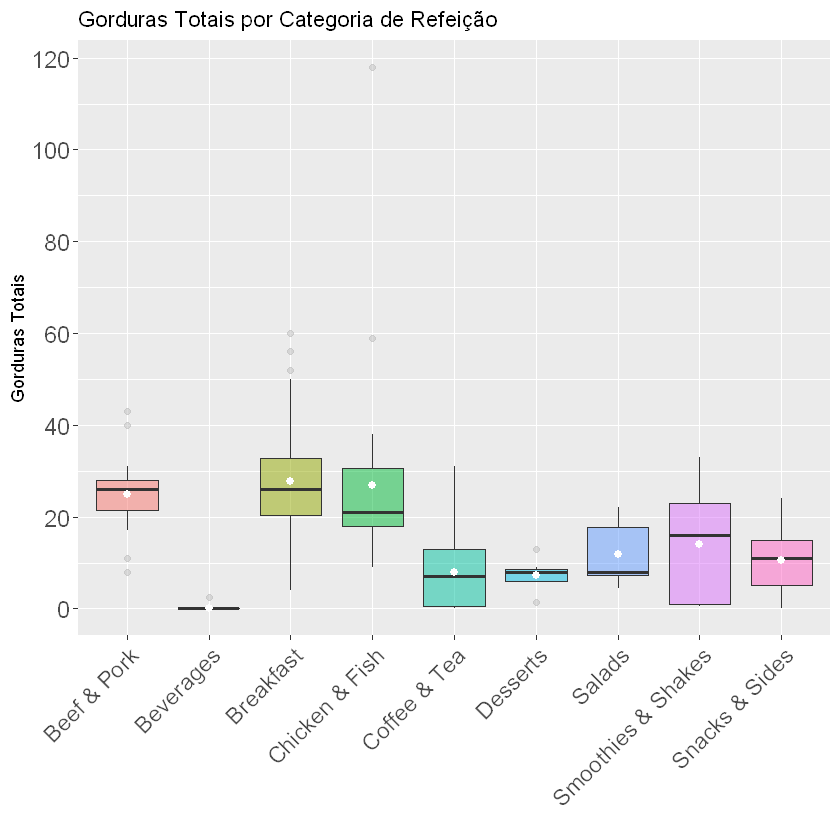

In [31]:
df_mc %>%
ggplot(aes(Category, Total.Fat, fill = Category)) +
geom_boxplot(outlier.color= "grey", alpha = .5, show.legend=F) +
stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
scale_y_continuous(breaks = seq(0,120,20)) +
labs(title="Gorduras Totais por Categoria de Refeição", x="", y= "Gorduras Totais") +
theme(axis.text.x = element_text(angle = 45, hjust = 1,
                                 vjust = 1,size = 14), 
      axis.text.y = element_text(size = 14))

Diego Ramirez <br>
daarfarias@hotmail.com <br>
https://github.com/daarfarias <br>